In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config) 
from keras.callbacks import ModelCheckpoint
import matplotlib as plt



C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [2]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# import numpy as np

# data=np.load('data.npy')
# target=np.load('target.npy')
# from sklearn.model_selection import train_test_split

# train_datagen,test_datagen,training_set,test_set=train_test_split(data,target,test_size=0.2)


In [3]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10699 images belonging to 3 classes.
Found 4454 images belonging to 3 classes.


In [5]:
train_dir = "dataset/Train"
test_dir = "dataset/Test"


print("Train set:\n========================================")
num_Covid19_Positive = len(os.listdir(os.path.join(train_dir, 'Covid19 Positive')))
num_Covid19_Negative = len(os.listdir(os.path.join(train_dir, 'Covid19 Negative')))
num_Covid19_Negative = len(os.listdir(os.path.join(train_dir, 'Pneumonia')))

print(f"Covid19 Positive={num_Covid19_Positive}")
print(f"Covid19 Negative={num_Covid19_Negative}")


print("Test set:\n========================================")
print(f"Covid19 Positive={len(os.listdir(os.path.join(test_dir, 'Covid19 Positive')))}")
print(f"Covid19 Negative={len(os.listdir(os.path.join(test_dir, 'Covid19 Negative')))}")
print(f"Covid19 Negative={len(os.listdir(os.path.join(test_dir, 'Pneumonia')))}")





Train set:
Covid19 Positive=2532
Covid19 Negative=1032
Test set:
Covid19 Positive=1084
Covid19 Negative=3057
Covid19 Negative=313


In [10]:
positive = os.listdir("dataset/Train/Covid19 Positive")
positive_dir = "dataset/train/Covid19 Positive"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(positive_dir, positive[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Covid19 Positive X-Ray") 
    
plt.tight_layout()

AttributeError: module 'matplotlib' has no attribute 'figure'

In [11]:
normal = os.listdir("dataset/Train/Covid19 Negative")
normal_dir = "dataset/Train/Covid19 Negative"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Covid19 Negative X-Ray") 
    
    
plt.tight_layout()

AttributeError: module 'matplotlib' has no attribute 'figure'

In [12]:
import os
Covid19_Negative_img = os.listdir("dataset/Train/Covid19 Negative")[0]
Covid19_Negative_dir = "dataset/Train/Covid19 Negative"
sample_img = plt.imread(os.path.join(normal_dir,Covid19_Negative_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

AttributeError: module 'matplotlib' has no attribute 'imread'

In [13]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [14]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=256,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a Third convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# Adding a 4th convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a 5th convolutional layer and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=16,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))

In [15]:
## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge')

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        204864    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          100384    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4

In [10]:
# # Part 3 - Training the CNN

# # Compiling the CNN

# # cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
# cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# # Training the CNN on the Training set and evaluating it on the Test set
# r=cnn.fit(x = training_set, validation_data = test_set, epochs = 30,callbacks=[checkpoint])

In [17]:
# Part 3 - Training the CNN

# Compiling the CNN

# cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 2)

Epoch 1/2
335/335 [==============================] - 136s 406ms/step - loss: 0.8930 - accuracy: 0.5547 - val_loss: 0.8398 - val_accuracy: 0.6863
Epoch 2/2
335/335 [==============================] - 81s 243ms/step - loss: 0.6038 - accuracy: 0.6693 - val_loss: 0.8417 - val_accuracy: 0.4376


In [18]:
evaluation = cnn.evaluate(test_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = cnn.evaluate(training_set)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

140/140 [==============================] - 9s 66ms/step - loss: 0.8417 - accuracy: 0.4376
Test Accuracy: 43.76%
335/335 [==============================] - 32s 96ms/step - loss: 0.5716 - accuracy: 0.6817
Train Accuracy: 68.17%


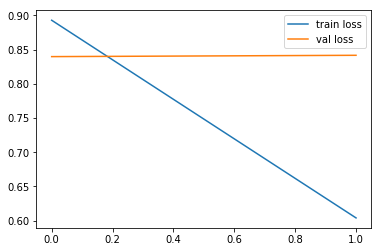

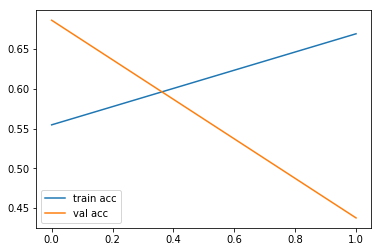

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['Normal', 'COVID-19','Pneumonia']
label_names = [0,1,2]

In [23]:
Y_pred = cnn.predict(train_datagen) # Ganti dengan test generator
y_pred = np.argmax(Y_pred ,  axis = 1)

ValueError: Failed to find data adapter that can handle input: <class 'tensorflow.python.keras.preprocessing.image.ImageDataGenerator'>, <class 'NoneType'>

In [ ]:
cm = confusion_matrix(test_generator.classes, y_pred, labels = label_names)

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

In [ ]:
print('classification_Report')
print(classification_report(test_generator.classes, y_pred, target_names=class_to_label_map))

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()

In [13]:
# save it as a h5 file


from tensorflow.keras.models import load_model

# cnn.save('SvmAndCnn.h5')
cnn.save('SvmAndCnn.h5')
from tensorflow.keras.models import load_model
 


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [33]:
y_predict=cnn.predict(test_set)
y_true=test_set
res = tf.math.confusion_matrix(y_true,y_predict)

In [ ]:
'dataset/Covid19 Positive/Covid-142.png'
'dataset/Covid19 Negative/Normal-2.png'